# TP 5 Réseaux de neurones - Multi classification et Propagation en avant

Dans ce TP, nous aimerions faire une classification multiclasse. Pour ce faire, nous allons comparer entre une classification utilisant la regression logistique, et une classification en utilisant les réseaux de neurones.

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2
import sklearn.neural_network as scikit
import sklearn.model_selection as sk


# Lecture des fichiers de données

Pour ce TP, nous allons lire les données à partir d'un fichier csv.


In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape


(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.


In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept = np.ones((data.shape[0], 1))
X = np.column_stack((intercept, data[:, :-1]))
y = data[:, -1]
# forcer y à avoir une seule colonne
y = y.reshape(y.shape[0], 1)


In [4]:
print('X', X.shape, ' y ', y.shape)


X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données


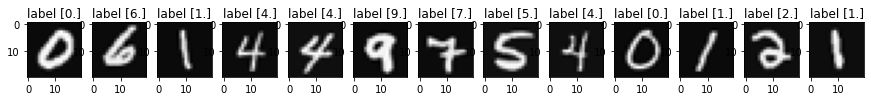

In [5]:
plt.figure(figsize=(15, 8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c, 1:].reshape((20, 20))
    a = np.transpose(a)
    plt.subplot(1, 13, i+1)
    plt.title('label ' + str(y[c]))
    plt.imshow(a, cmap='gray')


# Partie 1, régression logistique

Dans cette partie, nous aimerions utiliser la régression logistique pour classifier nos images

Rappelons que la régression logistique nous donne la probabilité d'appartenance (oui ou non) à la classe 1 (elle permet une classification binaire).

Pour étendre la régression logistique à une multi-classification, nous allons utiliser une stratégie 1 contre tous.

Nous paramètres $\theta$ seront donc une matrice avec un nombre de lignes égale au nombre de classes, et avec un nombre de colones égale au nombre decaractéristiques (chaque ligne de la matrice $\theta$ correspond aux paramètres d'un classifieur.


In [6]:
def lrCostFunction(X, y, theta, alpha, MaxIter, lambda_):
    global all_costs
    cost = []
    for i in range(MaxIter):
        # Sigmoid:
        h = 1 / (1 + np.exp(-X.dot(theta))).reshape(X.shape[0], 1)

        # Cost:
        # étant donné que nous travaillons avec log, pour eviter les problèmes nous ajoutons ou enlevons une valeur
        # epsilon aux valeurs 0 et 1
        h[h == 0.] += np.finfo(float).eps
        h[h == 1.] -= np.finfo(float).eps

        #cost.append((lambda_ * np.sum(np.power(theta[1:], 2)) / 2 - np.sum(((y * np.log(h)) + ((1-y) * np.log(1-h))))) / X.shape[0])

        # Gradient Descent:
        h[h >= 0.5] = 1
        h[h < 0.5] = 0

        theta = theta * (1 - alpha * lambda_ / X.shape[0]) - np.sum(np.multiply((h - y), X), axis=0) * alpha / X.shape[0]
        theta[0] -= theta[0] * (1 - alpha * lambda_ / X.shape[0])

    #all_costs.append(cost)

    return theta


In [7]:
# This is a try
lambda_ = 0.1
alpha = 0.01

theta_t = np.array([0.1, 0.4, -0.12])

pred_t = np.array([1, 2, 3]).reshape(3, 1)
X_t = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

theta_t = theta_t * (1 - alpha * lambda_ / 3) - np.sum(np.multiply(pred_t, X_t), axis=0) * alpha / 3
print((theta_t * (1 - alpha * lambda_ / 3)).shape)
theta_t = theta_t * (1 - alpha * lambda_ / 3)
theta_t.shape


(3,)


(3,)

In [8]:
def predictOneVsAll(all_theta, X):
    # ici en utilisant les paramètres calculés par la régression logisitique,
    # nous aiemrions retourner les etiquettes predites

    # Ici chaque classifieur retournera de probabilité, il faudra choisir
    # la probabilité maximale
    # de tous les classifieurs d'une exemple donné
    # répeter pour tous les exmeples
    
    print("Theta shape : ", all_theta.shape)
    print("X shape : ", X.shape)
    # Sigmoid:
    h = 1 / (1 + np.exp(-X.dot(all_theta)))
    print("h shape : ", h.shape)
    y_pred=np.argmax(h, axis=1)
    print("y_pred shape : ", y_pred.shape)
    return y_pred.reshape(y_pred.shape[0],1)


In [9]:
classes = np.unique(y)
number_classes = classes.shape[0]
all_theta = np.zeros((number_classes, X.shape[1]))
all_theta.shape


(10, 401)

In [11]:
MaxIter = 1000
lambda_ = 0.1
alpha = 0.01
# initial_theta pour chaque classifieur
initial_theta = np.zeros((X.shape[1]))
all_costs = []
#print('initial theta shape:', initial_theta.shape)

for i in range(number_classes):
    # appel pour chaque classifieur
    print("classe num : ", i)
    theta = lrCostFunction(X, (y == classes[i]).astype(int), initial_theta, alpha, MaxIter, lambda_)
    all_theta[i, :] = theta

print('all_theta shape :', all_theta.shape)
print('all_theta :\n', all_theta)
len(all_costs)


classe num :  0
classe num :  1
classe num :  2
classe num :  3
classe num :  4
classe num :  5
classe num :  6
classe num :  7
classe num :  8
classe num :  9
all_theta shape : (10, 401)
all_theta :
 [[ 8.00001120e-13  0.00000000e+00  0.00000000e+00 ... -2.97025904e-07
   4.12017671e-09  0.00000000e+00]
 [ 1.19999928e-12  0.00000000e+00  0.00000000e+00 ...  2.36572457e-06
   4.12017671e-09  0.00000000e+00]
 [ 8.23999730e-11  0.00000000e+00  0.00000000e+00 ...  5.16120985e-06
  -5.27952148e-07  0.00000000e+00]
 ...
 [ 2.03999955e-11  0.00000000e+00  0.00000000e+00 ... -3.32233722e-07
   4.77949421e-08  0.00000000e+00]
 [ 1.80399949e-10  0.00000000e+00  0.00000000e+00 ... -3.25325319e-06
   3.75363106e-07  0.00000000e+00]
 [ 4.67999886e-11  0.00000000e+00  0.00000000e+00 ... -5.10702702e-06
   3.24497663e-07  0.00000000e+00]]


0

In [12]:
y_pred = predictOneVsAll(all_theta.T, X)
y_pred

Theta shape :  (401, 10)
X shape :  (5000, 401)
h shape :  (5000, 10)
y_pred shape :  (5000,)


array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=int64)

# Qualité du classifieur RL

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec

moyenne(y==y-pred) \* 100

Ceci donnera un pourcentage de precision


In [13]:
precision = np.mean(y == y_pred)*100
precision


86.36

# Partie 2: Réseaux de neurones

Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)


In [14]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [15]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape


(10, 26)

In [16]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10


**Prédiction**

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.


In [18]:
# fonctions d'activation
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

# Loss Functions 
def logloss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))


In [19]:
def predict(W1, W2, X):
    global costs
    # appliquer une propagation en avant
    b = np.zeros((W1.shape[0]+1, 1))
    W= np.ones((1, W1.shape[1]))
    #feed forward with hidden layer 1
    W1 = np.vstack((W1,W))
    A_prev = X
    Z = (np.dot(W1, A_prev.T)) + b

    #feed forward with layer 2
    A = sigmoid(Z)
    y_pred=np.argmax(A, axis=0)
    y_pred=y_pred.reshape(y_pred.shape[0],1)
    cost=np.sum(np.power(np.subtract(y_pred,y),2))/X.shape[0]
    # print("cost1 : ", cost)
    costs.append(cost)

    A_prev = A
    b = np.zeros((W2.shape[0], 1))
    Z = (np.dot(W2, A_prev)) + b
    A = sigmoid(Z)

    #calculate predictions
    y_pred=np.argmax(A, axis=0)
    y_pred=y_pred.reshape(y_pred.shape[0],1)
    cost=np.sum(np.power(np.subtract(y_pred,y),2))/X.shape[0]
    # print("cost2 : ", cost)
    costs.append(cost)

    #calculate cost
    # !--- n'oubliez pas d'appliquer la sigmoid à chaque couche afin d'avoir les probabilités ---!
    # prédire la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie

    return y_pred.reshape(y_pred.shape[0],1)


In [20]:
def cost(y, y_pred, n):
    return np.sum(np.power(np.subtract(y,y_pred),2))/n

In [21]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
costs=[]
y_pred = predict(W1,W2,X)
precision = np.mean(y == y_pred)*100
print("precision : ",precision)
print("costs of all the layers : ",costs)
print("final cost : ",costs[-1])

95.38
0.7062


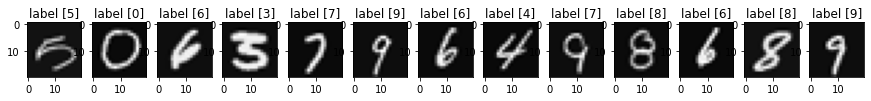

In [30]:
plt.figure(figsize=(15, 8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c, 1:].reshape((20, 20))
    a = np.transpose(a)
    plt.subplot(1, 13, i+1)
    plt.title('label ' + str(y_pred[c]))
    plt.imshow(a, cmap='gray')

# Vérification de l'implementation

Comparer vos algorithmes à ceux de scikitlearn


In [23]:
model = scikit.MLPClassifier(solver = 'lbfgs', hidden_layer_sizes=(hidden_layer_size,), activation='logistic')

X_train, X_test, y_train, y_test = sk.train_test_split(X,y, test_size = 0.33)
model.fit(X_train,np.ravel(y_train))
model.score(X_test,y_test)


0.9066666666666666

[5. 2. 7. ... 8. 2. 3.]


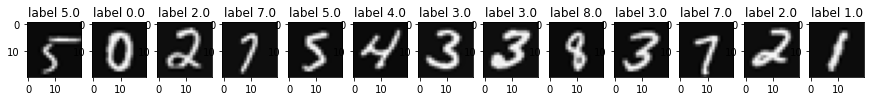

In [31]:
y_pred_scikit = model.predict(X_test)
print(y_pred_scikit)

plt.figure(figsize=(15, 8))
for i in range(13):
    c = random.randint(X_test.shape[0])
    a = X_test[c, 1:].reshape((20, 20))
    a = np.transpose(a)
    plt.subplot(1, 13, i+1)
    plt.title('label ' + str(y_pred_scikit[c]))
    plt.imshow(a, cmap='gray')

# Renforcement d'apprentissage

Mettre ici toute idée qui pourrait renforcer votre apprentissage


# Consignes


Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 22 Avril 2022 à 22h


In [25]:
# bonne chance
